In [1]:
import xarray as xr 
path2cube = "/Net/Groups/BGI/work_1/scratch/s3/deepextremes/v2/EventCube_ranked_pot0.01_ne0.1.zarr"
data = xr.open_zarr(path2cube)

def longitudetocoords(x):
       return (((x - 180) % 360) + 180) % 360

def coordstolongitude(x):
       return ((x + 180) % 360) - 180


In [3]:
import xarray as xr 
data = xr.open_zarr("/Net/Groups/BGI/scratch/crobin/PythonProjects/EarthNet/earthnet2023_veg_type.zarr")

In [4]:
data

<xarray.Dataset>
Dimensions:   (lat: 7400, lon: 7600, time: 2922)
Coordinates:
  * lat       (lat) float64 38.0 37.99 37.98 37.97 ... -35.97 -35.98 -35.99
  * lon       (lon) float64 -20.0 -19.99 -19.98 -19.97 ... 55.97 55.98 55.99
  * time      (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2022-12-31
Data variables:
    variable  (lon, lat, time) |S1 dask.array<chunksize=(238, 232, 183), meta=np.ndarray>
    veg_type  (lon, lat) |S1 dask.array<chunksize=(950, 925), meta=np.ndarray>
Attributes:
    description:  earthnet2023 dataset

In [2]:
dsc = data.sel(time="2021-03-01").roll(longitude = 180*4, roll_coords=True)
dscc = dsc.assign_coords(longitude = coordstolongitude(dsc.longitude))
dscc

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
    time       datetime64[ns] 2021-03-01
Data variables:
    layer      (latitude, longitude) float32 dask.array<chunksize=(6, 120), meta=np.ndarray>

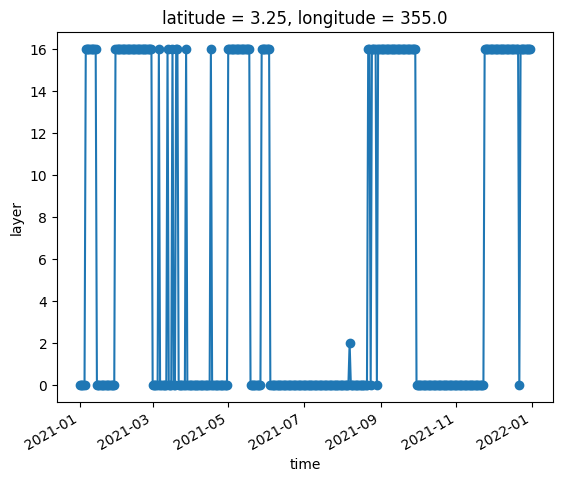

In [3]:
data.sel(longitude = longitudetocoords(-5), latitude=3.36, method = 'nearest').sel(time=slice("2021-01-01", "2021-12-31")).layer.plot.line(x="time", marker = "o")

In [4]:
from pathlib import Path
import datetime
import xarray as xr
import numpy as np
from tqdm import tqdm
import random
import multiprocessing as mp
from scipy.interpolate import interp1d
import os
import sys

basepath = Path("/scratch/crobin/earthnet2023/test_original/")
paths = list(basepath.glob("*/*.nc"))[:5]
print("len of the dataset: ", len(paths))
minicube = xr.open_dataset(paths[0])


len of the dataset:  5


In [5]:
longitude = np.mean(minicube.lon).item()
latitude = np.mean(minicube.lat).item()
time = minicube.time

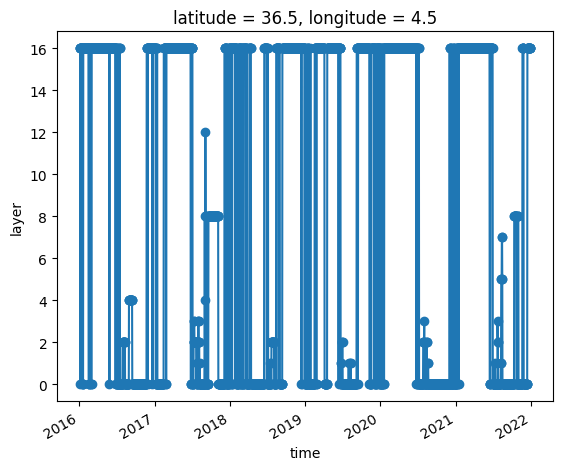

In [6]:
extremes = data.sel(longitude = longitudetocoords(longitude), latitude=latitude, method = 'nearest').sel(time=time).layer.plot.line(x="time", marker = "o")

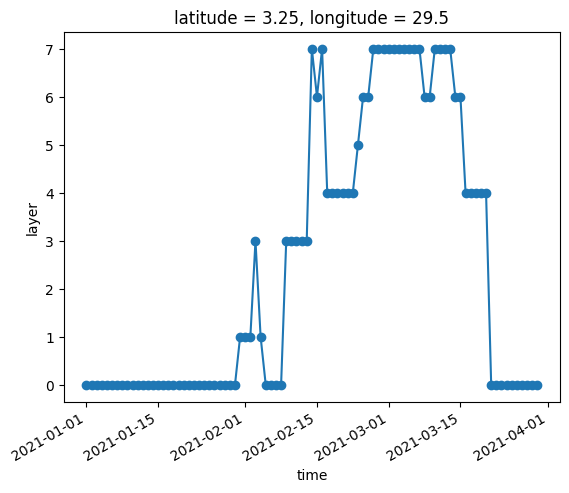

In [50]:
ds.sel(longitude = 29.4, latitude=3.36, method = 'nearest').sel(time=slice("2021-01-01", "2021-3-30")).layer.plot.line(x="time", marker = "o")